Python implementation with out using Numpy and sklearn modules
 

In [3]:
import pandas as pd
import random
import time


I used pandas and not wrote the pure python code using csv module for reading the csv files.


In [4]:
def ShuffleAndSplit(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        random.seed(random_seed)

    n = len(X)
    indices = list(range(n))
    random.shuffle(indices)

    split = int(n * (1 - test_size))

    X_train = [X[i] for i in indices[:split]]
    y_train = [y[i] for i in indices[:split]]
    X_test = [X[i] for i in indices[split:]]
    y_test = [y[i] for i in indices[split:]]

    return (X_train,y_train),(X_test, y_test)

In [5]:
def LoadData(filepath):
    df=pd.read_csv(filepath)
    #filling NaN as 0.0
    
    df['total_bedrooms'].fillna(0.0, inplace=True)
    #with pandas also we can convert categorical column to numerical columns same like one hot encoding
    df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)
    X = df.drop('median_house_value', axis=1)
    y = df['median_house_value']
    #For Normalization
    X = (X - X.min()) / (X.max() - X.min())
    (X_train, y_train), (X_test, y_test)= ShuffleAndSplit(X.values.tolist(), y.values.tolist(), test_size=0.2, random_seed=42)
    return (X_train, y_train), (X_test, y_test)

    


In [6]:
def Predict(X, W):
    return [sum(xi * wi for xi, wi in zip(x, W)) for x in X]

In [7]:

def ComputeCost(X, y, W):
    m = len(y)
    preds = Predict(X, W)
    return sum((p - yi)**2 for p, yi in zip(preds, y)) / m


for error I used (predicted-actual) not (actual-predicted) there is no significant difference as i adjusted formula according to it 

In [8]:
def GradientDescent(X, y, lr=0.01, epochs=100):
    m = len(y)
    n = len(X[0])
    W = [0.0] * n
    CostHistory = []

    for epoch in range(epochs):
        preds = Predict(X, W)
        gradients = [0.0] * n
        for i in range(m):
            error = preds[i] - y[i]
            for j in range(n):
                gradients[j] += 2*error * X[i][j]

        for j in range(n):
            W[j] -= (lr/m ) * gradients[j]

        cost = ComputeCost(X, y, W)
        CostHistory.append(cost)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return W, CostHistory

In [9]:
if __name__ == "__main__":
     # Update to your dataset path:
    filepath = r"C:\myfiles\sem4\housing.csv" 
    (X_train, y_train), (X_test, y_test) = LoadData(filepath)

    start = time.time()
    W, CostHistory = GradientDescent(X_train, y_train, lr=0.02, epochs=1000)
    duration = time.time() - start

    print(f"\nTraining completed in {duration:.2f} seconds")
    print("Final cost:", CostHistory[-1])

    # Evaluate on test data:
    preds = Predict(X_test, W)
    m = len(y_test)
    mae = sum(abs(p - y) for p, y in zip(preds, y_test)) / m
    rmse = (sum((p - y)**2 for p, y in zip(preds, y_test)) / m) ** 0.5
    ymean = sum(y_test) / m
    SquareSumofTotal= sum((y - ymean) ** 2 for y in y_test)
    SquareSumofModel= sum((y - p) ** 2 for y, p in zip(y_test, preds))
    r2 = 1 - (SquareSumofModel / SquareSumofTotal)

    print(f"\nTest MAE: {mae:.2f}")
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test R² Score: {r2:.4f}")


C:\Users\ravik\AppData\Local\Temp\ipykernel_28484\4046431317.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(0.0, inplace=True)


Epoch 0: Cost = 52446219266.96016
Epoch 10: Cost = 29319914242.81326
Epoch 20: Cost = 19370248433.31422
Epoch 30: Cost = 14978855175.373264
Epoch 40: Cost = 12945339712.816784
Epoch 50: Cost = 11923153603.489016
Epoch 60: Cost = 11344031280.950043
Epoch 70: Cost = 10966750003.032211
Epoch 80: Cost = 10687757014.081917
Epoch 90: Cost = 10461647959.955685
Epoch 100: Cost = 10267737158.599892
Epoch 110: Cost = 10095975044.464409
Epoch 120: Cost = 9940992618.469898
Epoch 130: Cost = 9799564374.931536
Epoch 140: Cost = 9669512757.362528
Epoch 150: Cost = 9549223312.843225
Epoch 160: Cost = 9437420784.829174
Epoch 170: Cost = 9333058444.976606
Epoch 180: Cost = 9235257938.22449
Epoch 190: Cost = 9143272728.255602
Epoch 200: Cost = 9056463383.79997
Epoch 210: Cost = 8974279403.537258
Epoch 220: Cost = 8896245063.770914
Epoch 230: Cost = 8821948001.940998
Epoch 240: Cost = 8751029811.110878
Epoch 250: Cost = 8683178192.63292
Epoch 260: Cost = 8618120356.76436
Epoch 270: Cost = 8555617443.22336

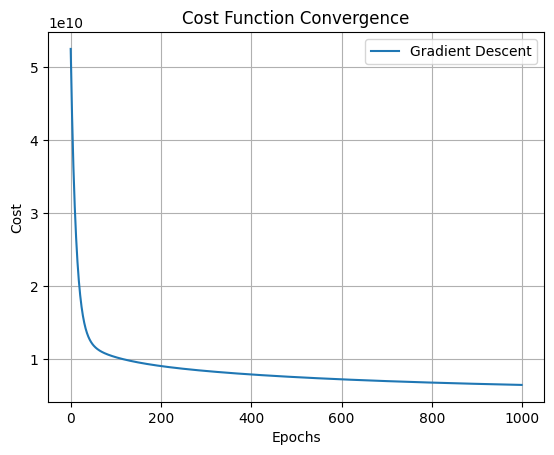

In [10]:
import matplotlib.pyplot as plt
def plot_cost(costs):
    plt.plot(costs, label='Gradient Descent')
    
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_cost(CostHistory)